# Results: Noise Texture Preservation

## Background: Importance of Noise Texture in Detectability
Noise texture is an important aspect of CT image quality, while its evaluation is not a part of the [IEC Standard 61223-3-5 on CT performance evaluation](https://webstore.iec.ch/publication/59789) or [US regulations 1020.33 on CT](https://www.ecfr.gov/current/title-21/chapter-I/subchapter-J/part-1020/section-1020.33), it is routinely a part of clinical image quality evaluationas due to its strong influence on low contrast detectability as illustrated below. 

Same also (**cite method dev notebook**) on comparing intensity histograms and NPS curves for noise. Below, two uniform water phantoms, of diameters 350 and 112 mm were images with reference noise quality values of 24 HU, such that both have the same noise mangitude measured in a central ROI. Despite having the same noise magnitude, the smaller 112 mm phantom has a visually lower low contrast detectability because the larger-sized grain noise is similar in size to the low contrast lesion and its standard deviation exceeds the contrast level of the lesions (3, 5, 10, 14 HU in order of the largest to smallest diameter lesion).

In [86]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

from utils import circle_select, get_circle_diameter, load_mhd

base_dir = '/gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/CCT189_peds/'
n_images = 10
small_phantom = load_mhd(base_dir + 'diameter112mm/fbp/dose_100/signal_present/signal_present.mhd') - 1000
large_phantom = load_mhd(base_dir + 'diameter350mm/fbp/dose_100/signal_present/signal_present.mhd') - 1000

phantom_diameter_px = get_circle_diameter(small_phantom[0])
circle_selection_diameter_px = 0.3*phantom_diameter_px # iec standard suggests centred circle ROI 40% of phantom diameter 
circle_selection = circle_select(small_phantom[0], (256, 256), r = circle_selection_diameter_px/2)

plt.figure(dpi=300)
plt.imshow(np.concatenate([large_phantom[:n_images].mean(axis=0), small_phantom[:n_images].mean(axis=0)], axis=1), vmin=-20, vmax=20, cmap='gray')
plt.colorbar(fraction=0.025, pad=0.01, label='HU')
plt.imshow(np.concatenate([circle_selection, circle_selection], axis=1), vmin=0, vmax=1, alpha=0.1, cmap='Reds')
plt.annotate(f'mean: {large_phantom[0, circle_selection].mean():2.0f} HU\nstd: {large_phantom[0, circle_selection].std():2.0f} HU', (256, 256), fontsize=8, bbox=dict(boxstyle='square,pad=0.3', fc="lightblue", ec="steelblue"))
plt.annotate(f'mean: {small_phantom[0, circle_selection].mean():2.0f} HU\nstd: {small_phantom[0, circle_selection].std():2.0f} HU', (256+512, 256), fontsize=8, bbox=dict(boxstyle='square,pad=0.3', fc="lightblue", ec="steelblue"))
plt.grid(False)
plt.title('350 mm | 112 mm Diameter Phantoms')
plt.show()

NameError: name 'sitk' is not defined

## Objective: Noise Texture Evaluation
This notebook evaluates the impact of the proposed noise-texture based data augmentation on the resulting image quality. As introduced in (**cite method development notebook**)

In [10]:
import sys
sys.path.append('../..')

from noise_assessments import load_data, plot_images, plot_noise_images, plot_nps_profiles

datadir = '/gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/CCT189_peds'
results_dir = '../../results/02-26-2024_19-52_redcnn_remove_random_noise_level'

In [9]:
results_dict, summary = load_data(datadir, results_dir)

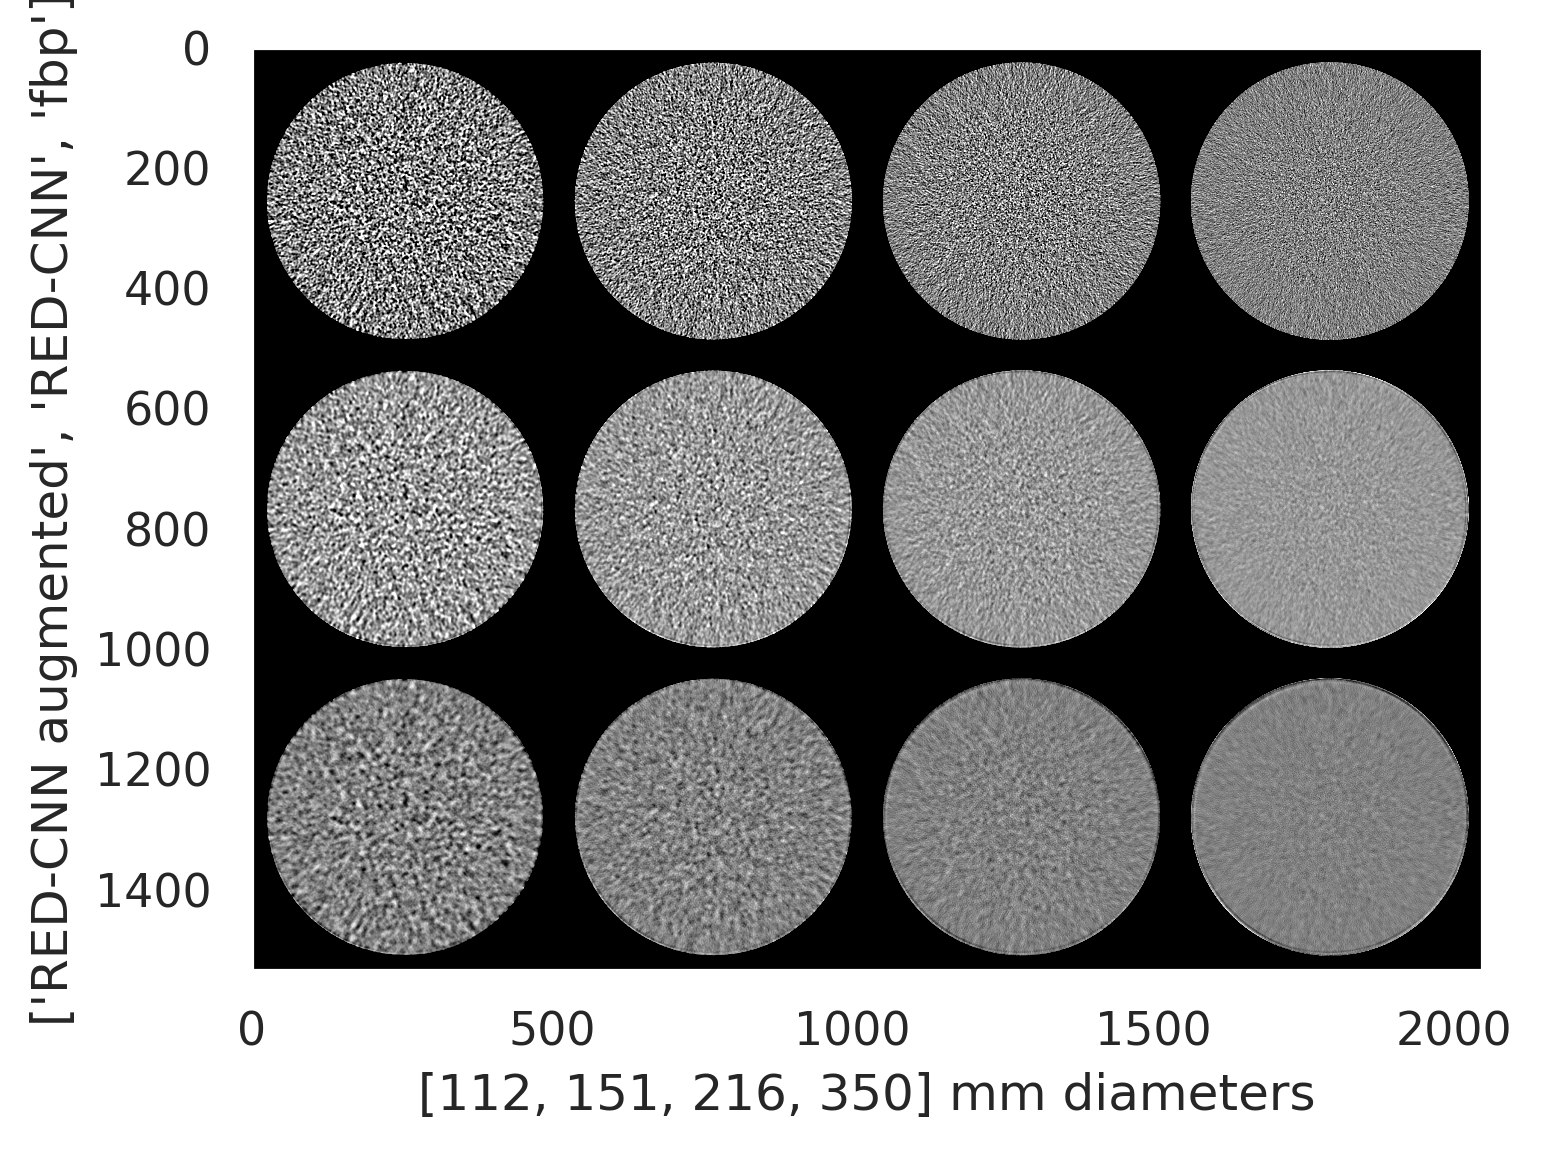

In [3]:
plot_images(results_dict, diameters=[112, 151, 216, 350])

PosixPath('../../results/02-26-2024_19-52_redcnn_remove_random_noise_level/noise_images.png')

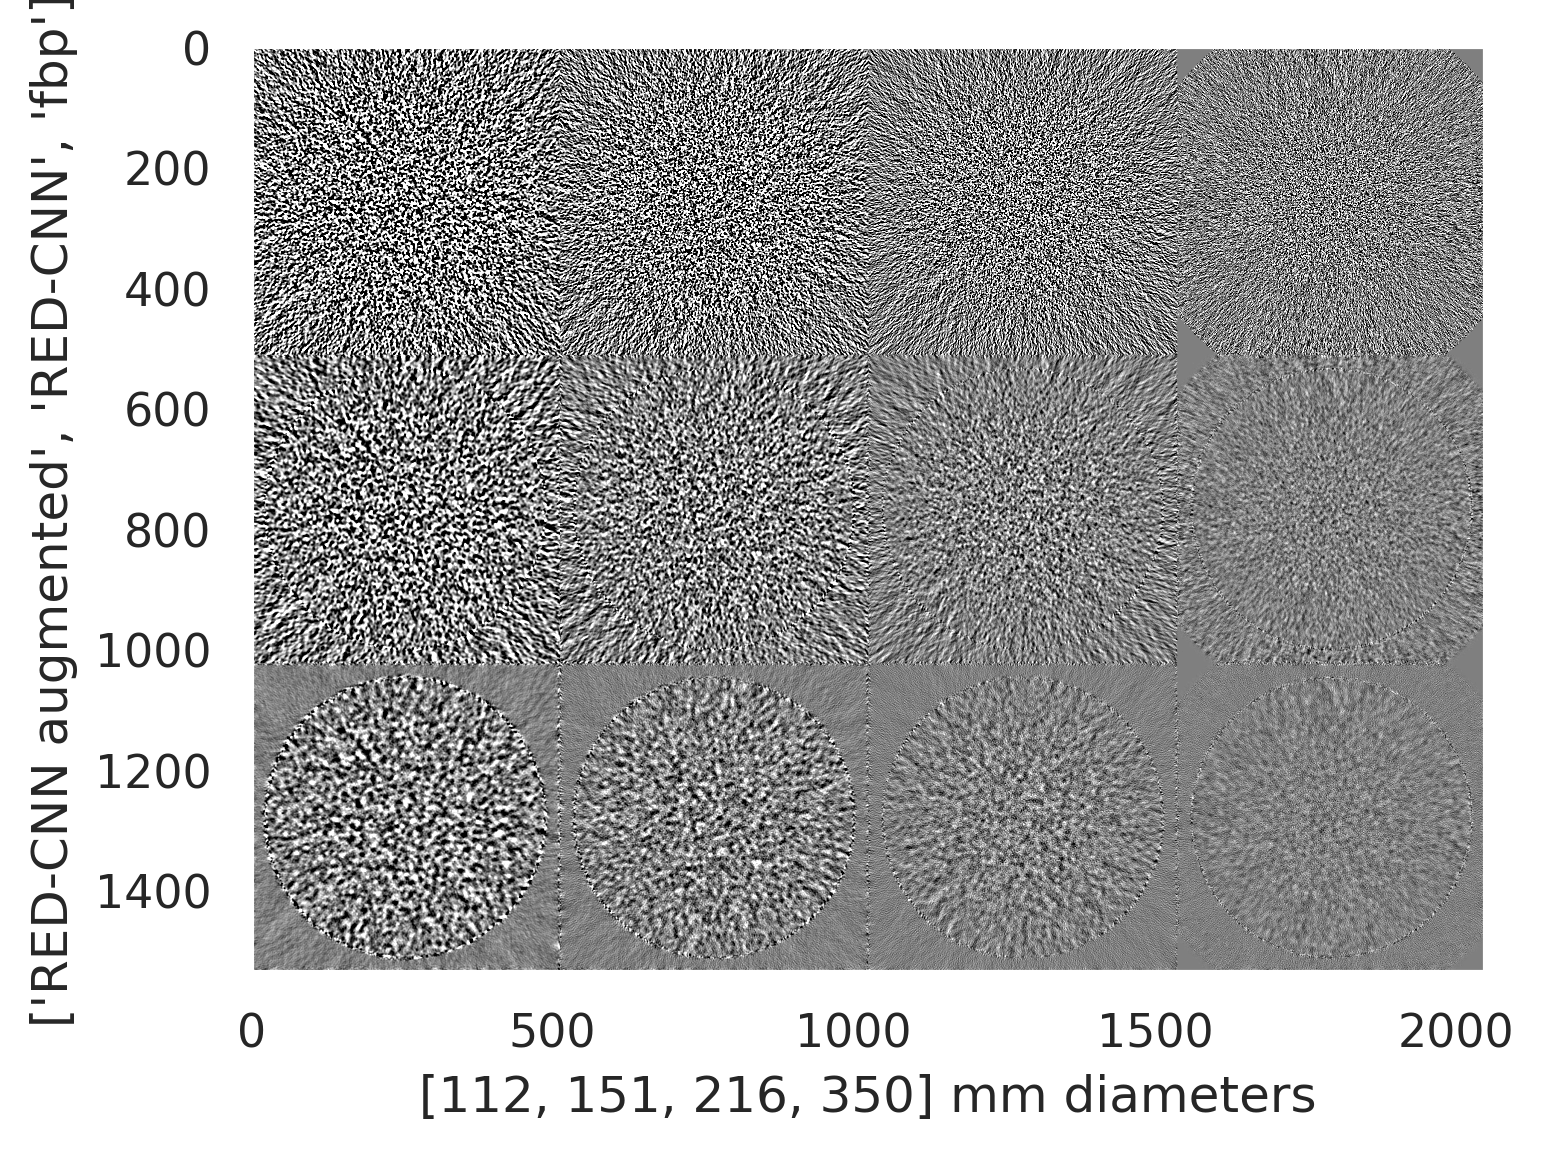

In [4]:
plot_noise_images(results_dict, results_dir, diameters=[112, 151, 216, 350])

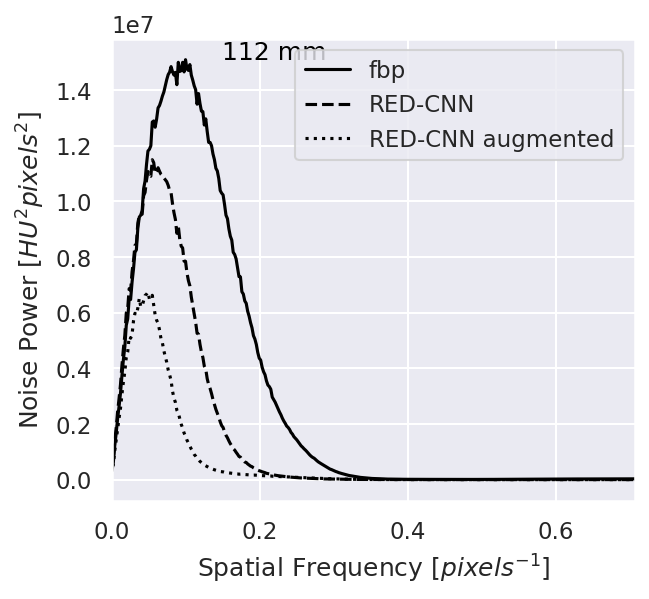

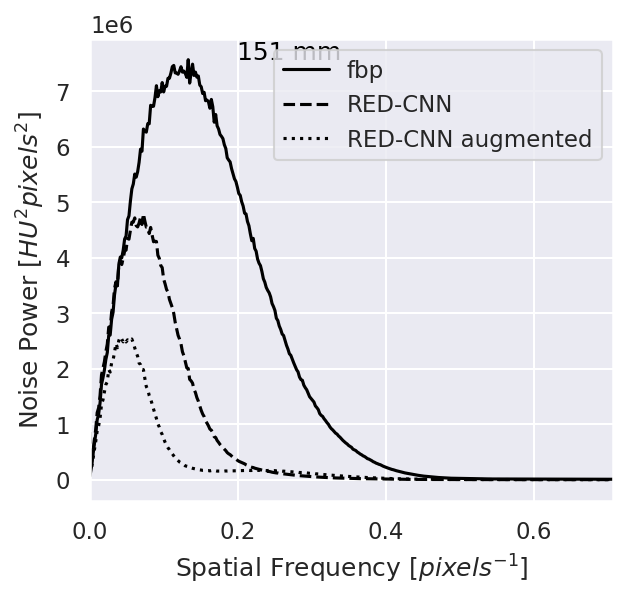

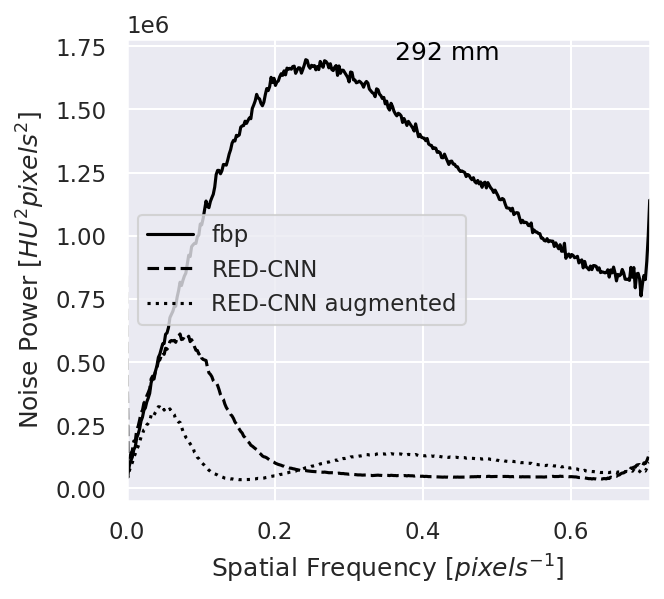

In [5]:
diameters = sorted(summary['diameter [mm]'].unique())
for d in diameters[::2]:
    if d == 200: continue
    plot_nps_profiles(results_dict, results_dir, diameters=[d], dpi=150)

PosixPath('../../results/02-26-2024_19-52_redcnn_remove_random_noise_level/nps.png')

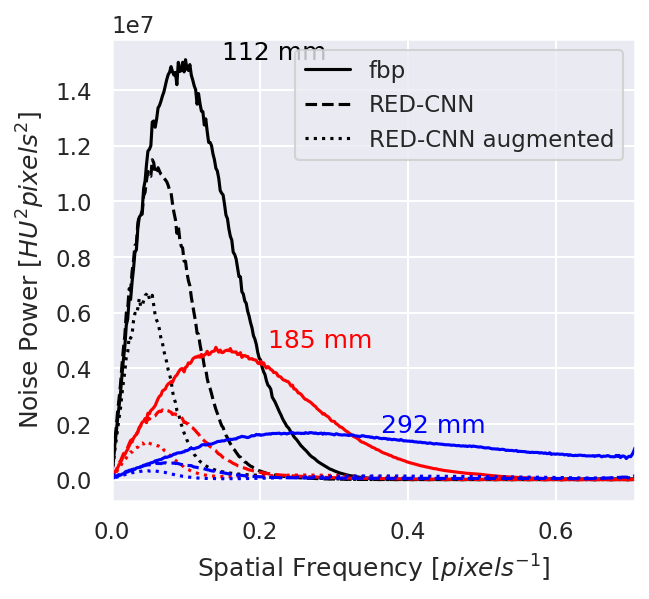

In [6]:
plot_nps_profiles(results_dict, results_dir, diameters=[112, 185, 292], dpi=150)

PosixPath('../../results/02-26-2024_19-52_redcnn_remove_random_noise_level/nps.png')

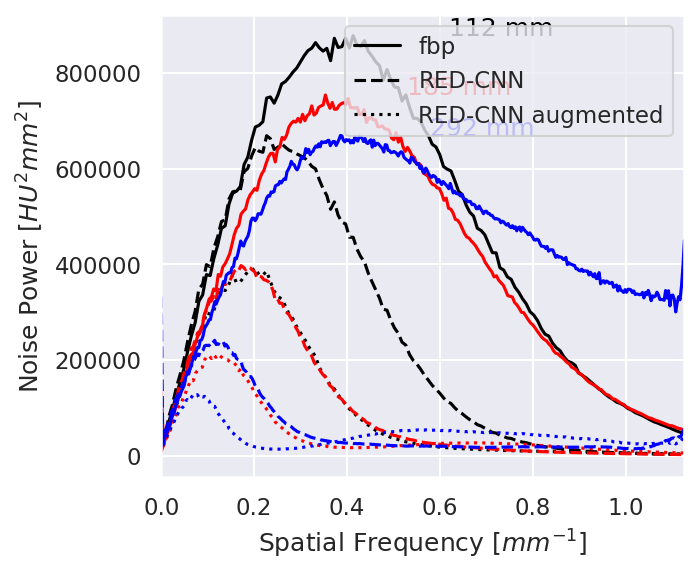

In [7]:
plot_nps_profiles(results_dict, results_dir, diameters=[112, 185, 292], dpi=150, units='mm')

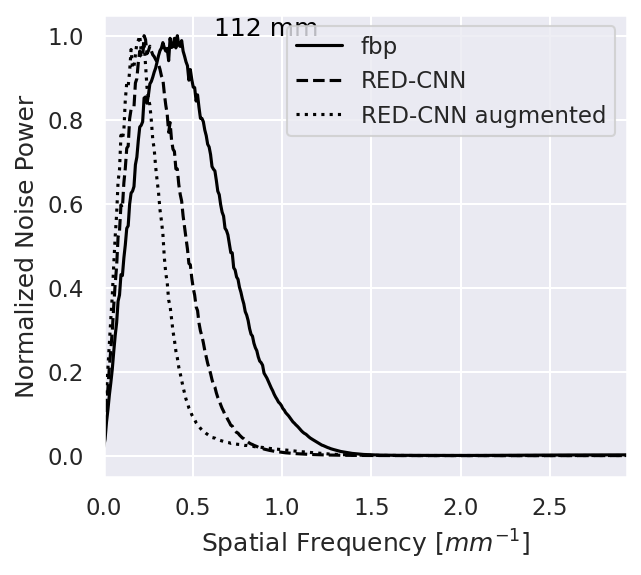

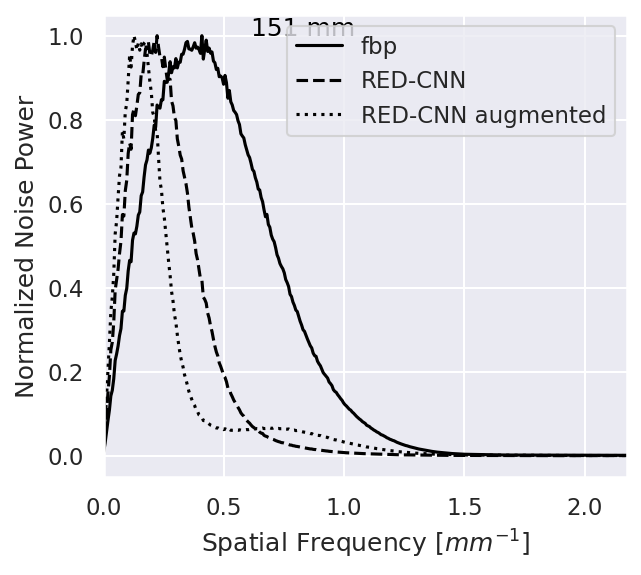

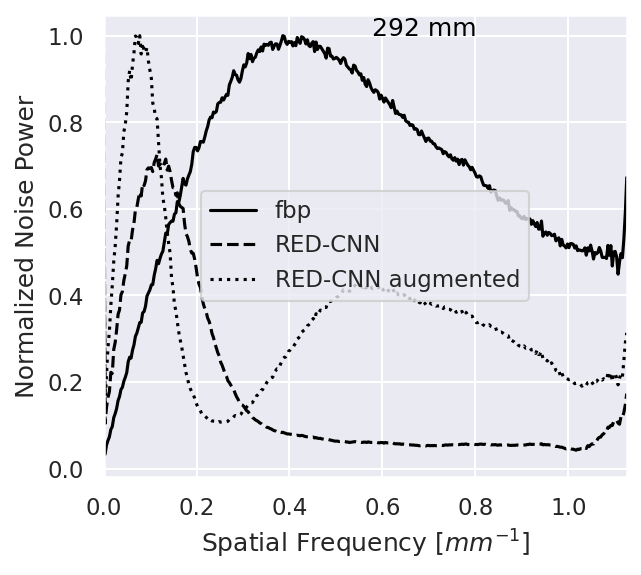

In [8]:
diameters = sorted(summary['diameter [mm]'].unique())
for d in diameters[::2]:
    if d == 200: continue
    plot_nps_profiles(results_dict, results_dir, diameters=[d], dpi=150, normalized=True, units='mm')